#Exercise : Implement the codes for the Blog mentioned below. 
https://machinelearningmastery.com/decompose-time-series-data-trend-seasonality/

- Example code with random numbers

[7, 10, 9, 11, 9, 7, 14, 15, 18, 11, 16, 18, 22, 16, 22, 22, 24, 21, 23, 21, 29, 24, 28, 25, 25, 34, 27, 35, 35, 32, 38, 38, 33, 35, 35, 42, 43, 46, 43, 46, 41, 49, 51, 47, 51, 54, 55, 55, 51, 50, 54, 56, 53, 55, 61, 63, 65, 66, 61, 62, 62, 70, 70, 66, 70, 67, 73, 77, 76, 73, 75, 72, 82, 83, 76, 77, 83, 85, 87, 85, 87, 91, 86, 90, 89, 94, 93, 95, 92, 92, 95, 101, 94, 103, 96, 104, 106, 102, 106]


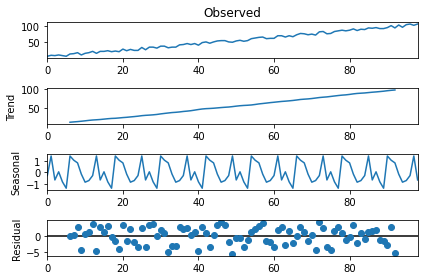

In [1]:
from random import randrange
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
# https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
series = [i+randrange(10) for i in range(1,100)]
print(series)
result = seasonal_decompose(series, period=12)
#result = seasonal_decompose(series,period=12)
result.plot()
pyplot.show()

In [2]:
result

In [3]:
len(series) # 100 elements

99

In [4]:
series[2:7] # See some numbers with range and confirm the series -- does not matter much its random numbers

[9, 11, 9, 7, 14]

In [5]:
isinstance(series, list) # Return type is a list

True

In [6]:
result
 #Decomposeresult is at https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.DecomposeResult.html#statsmodels.tsa.seasonal.DecomposeResult

In [7]:
result.seasonal

array([-0.27256944,  1.44766865, -0.65947421,  0.05481151, -0.82614087,
       -1.38566468,  1.44394841,  1.07415675,  0.83978175, -0.14756944,
       -0.85590278, -0.71304563, -0.27256944,  1.44766865, -0.65947421,
        0.05481151, -0.82614087, -1.38566468,  1.44394841,  1.07415675,
        0.83978175, -0.14756944, -0.85590278, -0.71304563, -0.27256944,
        1.44766865, -0.65947421,  0.05481151, -0.82614087, -1.38566468,
        1.44394841,  1.07415675,  0.83978175, -0.14756944, -0.85590278,
       -0.71304563, -0.27256944,  1.44766865, -0.65947421,  0.05481151,
       -0.82614087, -1.38566468,  1.44394841,  1.07415675,  0.83978175,
       -0.14756944, -0.85590278, -0.71304563, -0.27256944,  1.44766865,
       -0.65947421,  0.05481151, -0.82614087, -1.38566468,  1.44394841,
        1.07415675,  0.83978175, -0.14756944, -0.85590278, -0.71304563,
       -0.27256944,  1.44766865, -0.65947421,  0.05481151, -0.82614087,
       -1.38566468,  1.44394841,  1.07415675,  0.83978175, -0.14

In [8]:
result.weights # all have same priority

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [9]:
result.nobs # number of observation = number of elements we added in list

(99,)

- Example code with Multiplicative model

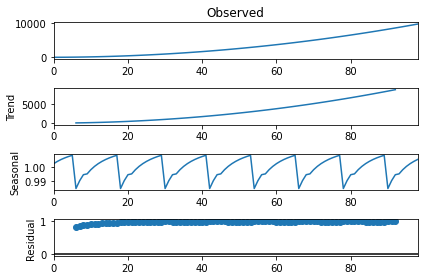

In [10]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i**2.0 for i in range(1,100)]
result = seasonal_decompose(series, model='multiplicative', period=12)
result.plot()
pyplot.show()

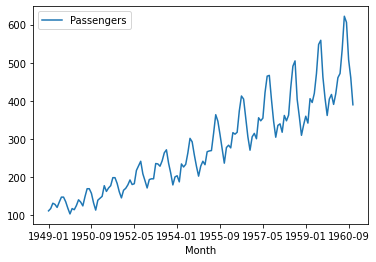

In [11]:
from pandas import read_csv
from matplotlib import pyplot
series = read_csv("airline-passengers1.csv", header=0, index_col=0)
series.plot()
pyplot.show()

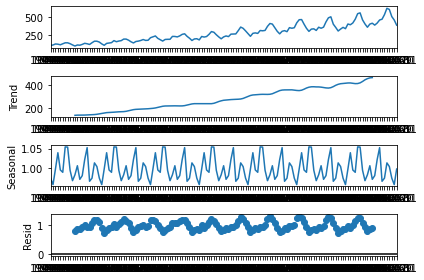

In [12]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
series = read_csv('airline-passengers1.csv', header=0, index_col=0)
result = seasonal_decompose(series, model='multiplicative',period = 20)
result.plot()
pyplot.show() #  use this line to avoid duplicate outputs


- example with seed and data frame

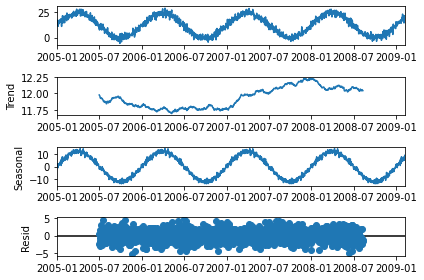

In [13]:
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

# Generate some data
np.random.seed(0)
n = 1500
dates = np.array('2005-01-01', dtype=np.datetime64) + np.arange(n)
data = 12*np.sin(2*np.pi*np.arange(n)/365) + np.random.normal(12, 2, 1500)
df = pd.DataFrame({'data': data}, index=dates)

# Reproduce the example in OP
#seasonal_decompose(df, model='additive', period=1).plot()
seasonal_decompose(df, model='additive', period=365).plot()
pyplot.show()

In [14]:
data

array([15.52810469, 13.00687469, 14.37053531, ..., 18.64313313,
       17.14303611, 19.23610988])

# Airline example using the dataframe option using csv file

In [15]:
import pandas as pd
import numpy as np
from statsmodels.tsa.seasonal import seasonal_decompose
 
#https://www.kaggle.com/rakannimer/air-passengers
df=pd.read_csv("airline.csv")
 
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [16]:
df.shape

(144, 2)

In [17]:
df.isnull().values.any()

False

In [18]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

<AxesSubplot:xlabel='Month'>

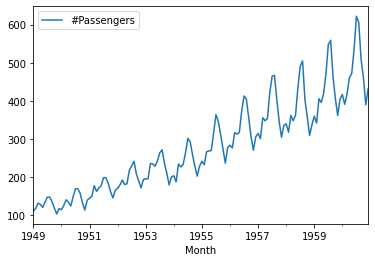

In [19]:
df.set_index('Month',inplace=True)
df.index=pd.to_datetime(df.index)

#drop null values
#df.dropna(inplace=True)
df.plot()

In [20]:
result=seasonal_decompose(df['#Passengers'], model='multiplicable', period=12)
#result=seasonal_decompose(df['#Passengers'], period=12)
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.seasonal_decompose.html
# model parameter is optional, put it via analysis. Impacts residuals a lot. This api needs observation
#https://www.statsmodels.org/dev/generated/statsmodels.tsa.seasonal.DecomposeResult.html#statsmodels.tsa.seasonal.DecomposeResult

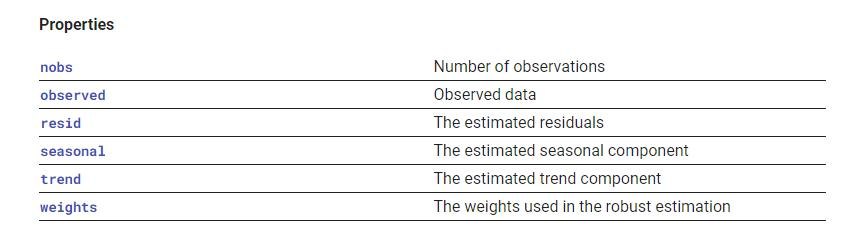

<AxesSubplot:xlabel='Month'>

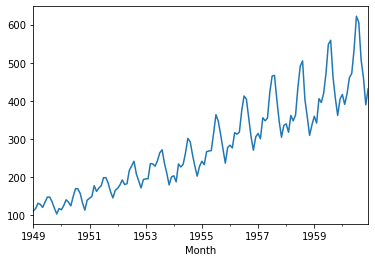

In [21]:
result.observed.plot()

<AxesSubplot:xlabel='Month'>

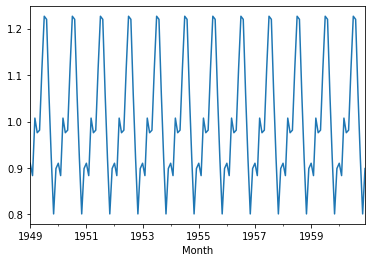

In [22]:
result.seasonal.plot()

<AxesSubplot:xlabel='Month'>

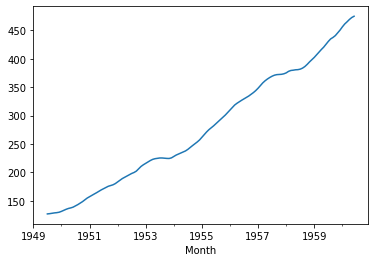

In [23]:
result.trend.plot()

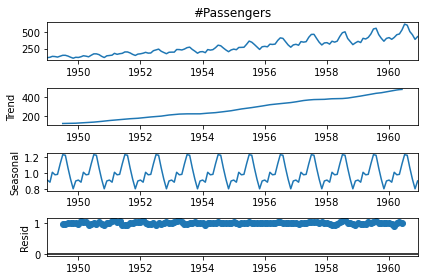

In [24]:
result.plot()
pyplot.show()